# we will predict wether a person is going to buy a SUV  or not

# import labraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### import data set

In [2]:
dataset=pd.read_csv("SocialNetworkAds.csv")

In [3]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


# extract independent variables and dependent varaiable

In [4]:
x=dataset.iloc[:,[2,3]].values #independent values
y=dataset.iloc[:,4].values # dependent

### vvisualization of the data set

<AxesSubplot:>

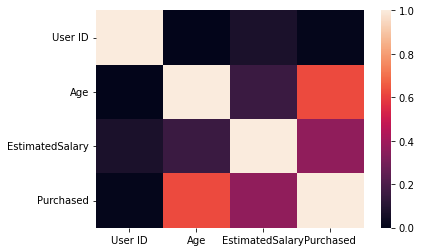

In [5]:
sns.heatmap(dataset.corr())

###  spelating the data into training set and test set

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

###  feture scaling: Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

# feeting K-NNin training set

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

### predict the test set result

In [17]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

## CONFUSION MATRIC EVALUTION

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

# visualization of traning training  result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


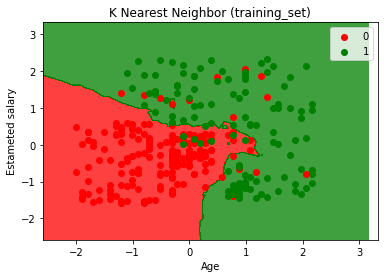

In [20]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                 np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))


plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(("red","green")))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())

for i ,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(("red","green"))(i),label=j)

plt.title("K Nearest Neighbor (training_set)")
plt.xlabel("Age")
plt.ylabel("Estameted salary")

plt.legend()
plt.show()




# visualization of test result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


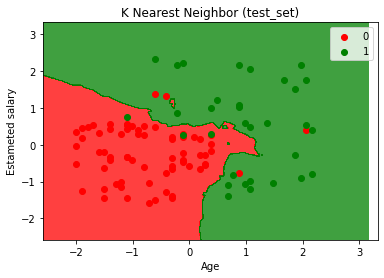

In [21]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                 np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))


plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(("red","green")))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())

for i ,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(("red","green"))(i),label=j)

plt.title("K Nearest Neighbor (test_set)")
plt.xlabel("Age")
plt.ylabel("Estameted salary")

plt.legend()
plt.show()


